In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 512, 512

train_data_dir = 'Train'
validation_data_dir = 'Validation'
nb_train_samples = 238
nb_validation_samples = 47
epochs = 20
batch_size =8

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('second.h5')

Found 238 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Epoch 1/20
29/29 [==============================] - 121s 4s/step - loss: 6.6151 - acc: 0.5502 - val_loss: 3.3145 - val_acc: 0.5750
Epoch 2/20
29/29 [==============================] - 119s 4s/step - loss: 1.1533 - acc: 0.6523 - val_loss: 0.5303 - val_acc: 0.6667
Epoch 3/20
29/29 [==============================] - 121s 4s/step - loss: 0.6069 - acc: 0.7127 - val_loss: 0.4227 - val_acc: 0.8718
Epoch 4/20
29/29 [==============================] - 120s 4s/step - loss: 0.5346 - acc: 0.7672 - val_loss: 0.4345 - val_acc: 0.7949
Epoch 5/20
29/29 [==============================] - 119s 4s/step - loss: 0.5429 - acc: 0.7542 - val_loss: 0.6983 - val_acc: 0.6923
Epoch 6/20
29/29 [==============================] - 119s 4s/step - loss: 0.4643 - acc: 0.8046 - val_loss: 0.4365 - val_acc: 0.7436
Epoch 7/20
29/29 [==============================] - 119s 4s/step - loss: 0.4226 - acc: 0.8118 - val_loss: 0.4444 - val_acc: 0.7750
Ep

In [16]:
for layer in model.layers:
    weights = layer.get_weights() 
    print(weights)

[array([[[[-1.33531377e-01,  9.44001302e-02, -2.44081262e-02,
          -1.48960516e-01, -1.80246998e-02,  2.89096590e-03,
          -7.22852424e-02,  2.79592052e-02, -1.04400657e-01,
          -9.67092514e-02,  1.46204466e-02,  3.74271236e-02,
           5.64172827e-02, -2.16464745e-04,  1.15828291e-01,
           8.98558795e-02, -4.52006757e-02, -6.90167919e-02,
          -3.12858187e-02, -6.80629760e-02,  2.15695500e-02,
           8.05384964e-02, -1.20215863e-01, -3.00467536e-02,
           1.54567674e-01,  1.67872850e-02,  8.82562436e-03,
           6.46814108e-02,  1.28833931e-02, -8.03140253e-02,
          -1.18002430e-01, -1.69745239e-03],
         [ 5.27244657e-02, -5.81890568e-02, -1.35884210e-01,
           5.42651415e-02, -2.52219010e-02, -1.50870234e-01,
          -1.34639442e-01,  8.28585401e-02,  1.29360542e-01,
           1.70962643e-02,  9.45468098e-02, -1.19221307e-01,
          -5.90659156e-02,  3.85833276e-03, -2.42603314e-03,
           8.93529356e-02, -3.50959115e

In [24]:
from __future__ import print_function

import h5py

def print_structure():
    """
    Prints out the structure of HDF5 file.

    Args:
      weight_file_path (str) : Path to the file to analyze
    """
    f = h5py.File('first.h5')
    try:
        if len(f.attrs.items()):
            print("{} contains: ".format('first.h5'))
            print("Root attributes:")
        for key, value in f.attrs.items():
            print("  {}: {}".format(key, value))

        if len(f.items())==0:
            return 

        for layer, g in f.items():
            print("  {}".format(layer))
            print("    Attributes:")
            for key, value in g.attrs.items():
                print("      {}: {}".format(key, value))

            print("    Dataset:")
            for p_name in g.keys():
                param = g[p_name]
                print("      {}: {}".format(p_name, param.shape))
    finally:
        f.close()

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 510, 510, 32)      896       
_________________________________________________________________
activation_41 (Activation)   (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 253, 253, 64)      18496     
_________________________________________________________________
activation_42 (Activation)   (None, 253, 253, 64)      0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 124, 124, 64)      36928     
__________

In [29]:
predictions=model.predict_generator(validation_generator,steps=nb_train_samples // batch_size)


In [31]:
import numpy 
predicted_classes=numpy.argmax(predictions,axis=1)

In [45]:
true_classes=validation_generator.classes
print(true_classes)
class_labels=list(validation_generator.class_indices.keys())
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
[[0.5192027 ]
 [0.5167277 ]
 [0.5149039 ]
 [0.51558745]
 [0.52088344]
 [0.5102781 ]
 [0.5205419 ]
 [0.5163154 ]
 [0.5138611 ]
 [0.5159064 ]
 [0.5164105 ]
 [0.51459426]
 [0.51351094]
 [0.521085  ]
 [0.51551926]
 [0.5186695 ]
 [0.5185111 ]
 [0.51642776]
 [0.51053846]
 [0.5155184 ]
 [0.5183026 ]
 [0.52027655]
 [0.51952237]
 [0.5225222 ]
 [0.51448935]
 [0.518714  ]
 [0.51540065]
 [0.5233609 ]
 [0.5096921 ]
 [0.516172  ]
 [0.5166109 ]
 [0.5210807 ]
 [0.5233218 ]
 [0.51636034]
 [0.5194246 ]
 [0.51225364]
 [0.51094246]
 [0.51939356]
 [0.51269704]
 [0.52130085]
 [0.51963663]
 [0.5222552 ]
 [0.5234515 ]
 [0.5177918 ]
 [0.51091504]
 [0.5181196 ]
 [0.5233672 ]
 [0.5163154 ]
 [0.516172  ]
 [0.521085  ]
 [0.5149039 ]
 [0.52027655]
 [0.51551926]
 [0.51269704]
 [0.5138611 ]
 [0.5155184 ]
 [0.5233672 ]
 [0.51939356]
 [0.5210807 ]
 [0.51094246]
 [0.5205419 ]
 [0.51540065]
 [0.5185111 ]
 [0.5166109 ]
 [0.516

In [4]:
predictions=model.predict_generator(validation_generator)
#print(predictions)
pred=[]
for i in range(0,47):
    if (predictions[i]<0.5):
        pred.append(0)
    else:
        pred.append(1)
        
#print(pred)
import numpy 
predicted_classes=numpy.argmax(predictions,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
from sklearn import metrics

report=metrics.classification_report(true_classes,pred,target_names=class_labels)
print(report)
from sklearn import metrics

report=metrics.classification_report(true_classes,pred,target_names=class_labels)
print(report)
confusion_matrix=metrics.confusion_matrix(true_classes, pred)
print(confusion_matrix)

              precision    recall  f1-score   support

      Benign       0.55      0.60      0.57        20
   Malignant       0.68      0.63      0.65        27

   micro avg       0.62      0.62      0.62        47
   macro avg       0.61      0.61      0.61        47
weighted avg       0.62      0.62      0.62        47

              precision    recall  f1-score   support

      Benign       0.55      0.60      0.57        20
   Malignant       0.68      0.63      0.65        27

   micro avg       0.62      0.62      0.62        47
   macro avg       0.61      0.61      0.61        47
weighted avg       0.62      0.62      0.62        47

[[12  8]
 [10 17]]


In [10]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 60 images belonging to 2 classes.


In [15]:
predictions=model.predict_generator(validation_generator)
#print(predictions)
pred=[]
for i in range(0,60):
    if (predictions[i]<0.5):
        pred.append(0)
    else:
        pred.append(1)
        
#print(pred)
import numpy 
predicted_classes=numpy.argmax(predictions,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
from sklearn import metrics

report=metrics.classification_report(true_classes,pred,target_names=class_labels)
print(report)
from sklearn import metrics

report=metrics.classification_report(true_classes,pred,target_names=class_labels)
print(report)
confusion_matrix=metrics.confusion_matrix(true_classes, pred)
print(confusion_matrix)

              precision    recall  f1-score   support

      Benign       0.55      0.62      0.58        26
   Malignant       0.68      0.62      0.65        34

   micro avg       0.62      0.62      0.62        60
   macro avg       0.61      0.62      0.61        60
weighted avg       0.62      0.62      0.62        60

              precision    recall  f1-score   support

      Benign       0.55      0.62      0.58        26
   Malignant       0.68      0.62      0.65        34

   micro avg       0.62      0.62      0.62        60
   macro avg       0.61      0.62      0.61        60
weighted avg       0.62      0.62      0.62        60

[[16 10]
 [13 21]]


In [26]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 512, 512

train_data_dir = 'Train'
validation_data_dir = 'Validation'
nb_train_samples = 238
nb_validation_samples = 47
epochs = 15
batch_size =8

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('third.h5')

Found 238 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Epoch 1/15
29/29 [==============================] - 51s 2s/step - loss: 1.2032 - acc: 0.5102 - val_loss: 0.5946 - val_acc: 0.6250
Epoch 2/15
29/29 [==============================] - 50s 2s/step - loss: 0.7149 - acc: 0.6092 - val_loss: 0.5778 - val_acc: 0.6923
Epoch 3/15
29/29 [==============================] - 50s 2s/step - loss: 0.6685 - acc: 0.6969 - val_loss: 0.5153 - val_acc: 0.7692
Epoch 4/15
29/29 [==============================] - 50s 2s/step - loss: 0.6107 - acc: 0.7413 - val_loss: 0.4423 - val_acc: 0.8205
Epoch 5/15
29/29 [==============================] - 50s 2s/step - loss: 0.5606 - acc: 0.7499 - val_loss: 0.5993 - val_acc: 0.5641
Epoch 6/15
29/29 [==============================] - 50s 2s/step - loss: 0.5718 - acc: 0.7687 - val_loss: 0.5689 - val_acc: 0.6667
Epoch 7/15
29/29 [==============================] - 50s 2s/step - loss: 0.5014 - acc: 0.7758 - val_loss: 0.5431 - val_acc: 0.7250
Epoch 8/1

In [27]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 47 images belonging to 2 classes.


In [48]:
predictions=model.predict_generator(validation_generator)
#print(predictions)
pred=[]
for i in range(0,47):
    if (predictions[i]<0.5):
        pred.append(0)
    else:
        pred.append(1)
        
#print(pred)
import numpy 
predicted_classes=numpy.argmax(predictions,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
from sklearn import metrics

report=metrics.classification_report(true_classes,pred,target_names=class_labels)
print(report)
from sklearn import metrics

report=metrics.classification_report(true_classes,pred,target_names=class_labels)
print(report)
confusion_matrix=metrics.confusion_matrix(true_classes, pred)
print(confusion_matrix)


              precision    recall  f1-score   support

      Benign       0.57      0.65      0.60        20
   Malignant       0.71      0.63      0.67        27

   micro avg       0.64      0.64      0.64        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.65      0.64      0.64        47

              precision    recall  f1-score   support

      Benign       0.57      0.65      0.60        20
   Malignant       0.71      0.63      0.67        27

   micro avg       0.64      0.64      0.64        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.65      0.64      0.64        47

[[13  7]
 [10 17]]


0.6398148148148148


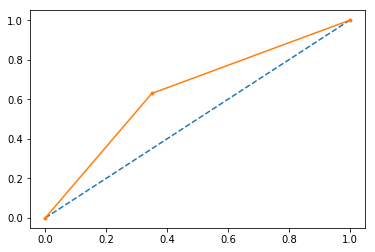

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(true_classes,pred)
print(auc)
from matplotlib import pyplot
fpr, tpr, thresholds=roc_curve(true_classes,pred)
pyplot.plot([0,1],[0,1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()